In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # a specialized 2d plotting library to visualise Numpy computations
import statsmodels.api as sm
    #these where imported after we set up the regression line
import seaborn as sns # a similar package to matplotlib but it's more advanced at it
sns.set() # basically it's like the relationship between css and html XD
sns.set_theme(style="whitegrid")

#these are the ones we are gonna mainly use for now

# import scipy # ecosystem for some of these libraries
# import sklearn # machine learning librarie it's gonna help later on

In [3]:
data = pd.read_csv('Automobile_data.csv') # this is used to import the data

In [4]:
# data1.describe()

In [5]:
data['horsepower'] = data['horsepower'].replace('?', np.nan)

In [6]:
data['price'] = data['price'].replace('?',np.nan)

In [7]:
data['horsepower'] = data['horsepower'].astype(float)

In [8]:
data['price'] = data['price'].astype(float)

In [9]:
# temp = data1.sub(data1.mean())

In [10]:
# data1= temp.div(temp.std())

In [11]:
data.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
data1 = data

In [13]:
data2 = data1[['highway-mpg' , 'engine-size' , 'horsepower' , 'curb-weight']].dropna()

In [14]:
data2.describe()

,highway-mpg,engine-size,horsepower,curb-weight
count,203.000000,203.000000,203.000000,203.000000
mean,30.748768,126.857143,104.256158,2555.921182
std,6.920406,41.845239,39.714369,523.205555
min,16.000000,61.000000,48.000000,1488.000000
25%,25.000000,97.000000,70.000000,2145.000000
50%,30.000000,119.000000,95.000000,2414.000000
75%,35.000000,143.000000,116.000000,2943.500000
max,54.000000,326.000000,288.000000,4066.000000


In [15]:
temp = data2.sub(data2.mean())
data2= temp.div(temp.std())

In [16]:
data2

,highway-mpg,engine-size,horsepower,curb-weight
0,-0.541698,0.075107,0.169809,-0.015140
1,-0.541698,0.075107,0.169809,-0.015140
2,-0.686198,0.600853,1.252540,0.510466
3,-0.108197,-0.426743,-0.056810,-0.418423
4,-1.264199,0.218492,0.270528,0.512378
...,...,...,...,...
200,-0.397198,0.337980,0.245348,0.757023
201,-0.830698,0.337980,1.403619,0.942419
202,-1.119699,1.102703,0.748944,0.871701
203,-0.541698,0.433570,0.043910,1.263516


In [17]:
data2

,highway-mpg,engine-size,horsepower,curb-weight
0,-0.541698,0.075107,0.169809,-0.015140
1,-0.541698,0.075107,0.169809,-0.015140
2,-0.686198,0.600853,1.252540,0.510466
3,-0.108197,-0.426743,-0.056810,-0.418423
4,-1.264199,0.218492,0.270528,0.512378
...,...,...,...,...
200,-0.397198,0.337980,0.245348,0.757023
201,-0.830698,0.337980,1.403619,0.942419
202,-1.119699,1.102703,0.748944,0.871701
203,-0.541698,0.433570,0.043910,1.263516


In [18]:
Corr_mtx = data2.corr()

In [19]:
Corr_mtx_np = Corr_mtx.to_numpy()

In [20]:
P , V = np.linalg.eig(Corr_mtx_np)

In [21]:
P

array([3.3302706 , 0.09043126, 0.3268371 , 0.25246104])

In [22]:
V

array([[ 0.48636693, -0.39412622,  0.77475153, -0.08872308],
       [-0.5020525 ,  0.59458933,  0.62485679,  0.06293488],
       [-0.50027261, -0.37542982,  0.03380273, -0.77951083],
       [-0.51099687, -0.59176051,  0.09039592,  0.61687136]])

In [23]:
MCR = data2.to_numpy()

In [24]:

A = np.asmatrix(V[0]).reshape(4,1);
B = np.asmatrix(V[2]).reshape(4,1);

In [25]:
np.dot(MCR,A)
F1 = np.array(np.dot(MCR,A))

In [26]:
np.dot(MCR,B)
F2 = np.array(np.dot(MCR,B))

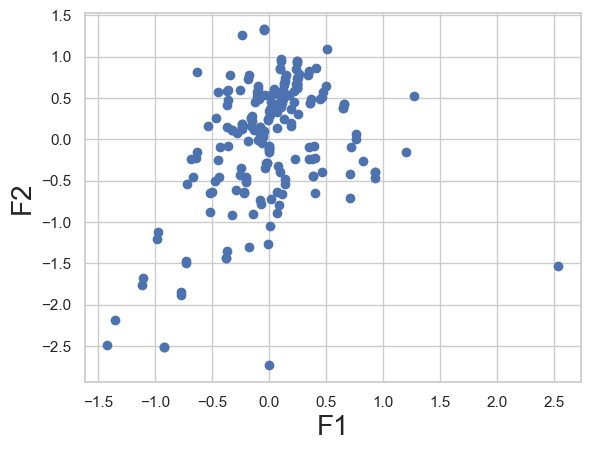

In [27]:
plt.scatter(F1,F2) # this is where all the magic happends , this is what creats those points (aka scatter point for our regression visualisation)
plt.xlabel('F1' , fontsize=20) # this simply creates the X axis 
plt.ylabel('F2' , fontsize=20) # and this creates the Y axis
plt.show() # this simply shows the results

In [28]:
data_NAN = data1.dropna()

In [29]:
A = np.asmatrix(np.array(data_NAN['price']).astype(int))

In [30]:
A

matrix([[13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
         16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,
          6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,
          8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,  7295,
          7895,  9095,  8845, 10295, 12945, 10345,  6785, 11048, 32250,
         35550, 36000,  5195,  6095,  6795,  6695,  7395, 10945, 11845,
         13645, 15645,  8845,  8495, 10595, 10245, 10795, 11245, 18280,
         18344, 25552, 28248, 28176, 31600, 34184, 35056, 40960, 45400,
         16503,  5389,  6189,  6669,  7689,  9959,  8499, 12629, 14869,
         14489,  6989,  8189,  9279,  9279,  5499,  7099,  6649,  6849,
          7349,  7299,  7799,  7499,  7999,  8249,  8949,  9549, 13499,
         14399, 13499, 17199, 19699, 18399, 11900, 13200, 12440, 13860,
         15580, 16900, 16695, 17075, 16630, 17950, 18150,  5572,  7957,
          6229,  6692,  7609,  8921, 12764, 22018, 32528, 34028,

In [31]:
np.array(data1['price'].dropna()).size

201

In [32]:

A = np.delete(np.array(F2), [201,202]);
A.size

201

In [33]:

B = np.delete(np.array(F1), [201,202]);
B.size

201

In [34]:
final_data = pd.DataFrame({"P1":B,"P2":A ,"price":np.array(data1['price'].dropna())})

<AxesSubplot:xlabel='P1', ylabel='P2'>

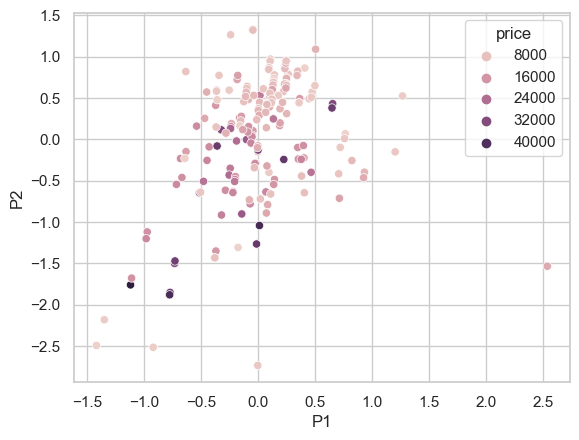

In [35]:
sns.scatterplot(data=final_data, x="P1", y="P2", hue="price")

In [36]:
data4 = data2[['highway-mpg','horsepower']]

In [37]:
from sklearn.decomposition import PCA

In [38]:
mypca = PCA(n_components=2)

In [39]:
mypca.fit_transform(data2[['highway-mpg','horsepower']])

array([[ 0.50311101, -0.26296535],
       [ 0.50311101, -0.26296535],
       [ 1.3708949 ,  0.4004644 ],
       [ 0.03633651, -0.11667743],
       [ 1.0852156 , -0.70263146],
       [ 0.68966034, -0.4851243 ],
       [ 0.68966034, -0.4851243 ],
       [ 0.68966034, -0.4851243 ],
       [ 1.73468998, -0.46186535],
       [ 1.88643204,  0.09858498],
       [ 0.12070877, -0.23665931],
       [ 0.12070877, -0.23665931],
       [ 0.57898204,  0.01725982],
       [ 0.57898204,  0.01725982],
       [ 0.88551325, -0.28927139],
       [ 2.27813785,  0.4902908 ],
       [ 2.27813785,  0.4902908 ],
       [ 2.48249199,  0.28593666],
       [-3.27519582,  1.27193545],
       [-1.86171931,  0.64187057],
       [-1.86171931,  0.64187057],
       [-1.69297479,  0.40190681],
       [-1.38644358,  0.0953756 ],
       [ 0.03633651, -0.11667743],
       [-1.38644358,  0.0953756 ],
       [-1.38644358,  0.0953756 ],
       [-1.38644358,  0.0953756 ],
       [ 0.03633651, -0.11667743],
       [-0.21293083,

In [40]:
print(mypca.singular_values_) # variance

[18.91357592  6.80269402]


In [41]:
print(mypca.explained_variance_ratio_) #percentage

[0.88545385 0.11454615]


In [42]:
print(mypca.components_)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [43]:
# from mlxtend.data import iris_data
# from mlxtend.plotting import plot_pca_correlation_graph

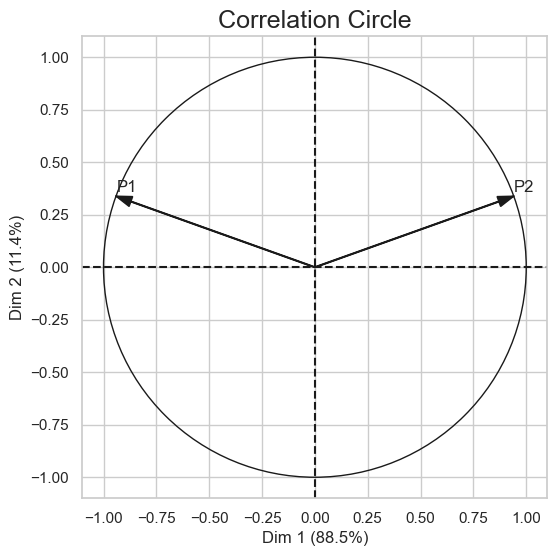

In [44]:
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(data4) # Normalizing the feature columns is recommended (X - mean) / std
fig, correlation_matrix = plot_pca_correlation_graph(
    X_norm, 
    ["P1","P2"],
    dimensions=(1, 2),
    figure_axis_size=6
)

In [45]:
mypca2 = PCA(n_components=4)

In [46]:
mypca2.fit_transform(data2[['highway-mpg' , 'engine-size' , 'horsepower' , 'curb-weight']])

array([[ 3.78385648e-01, -3.68378842e-01,  8.89189919e-02,
        -2.03362799e-01],
       [ 3.78385648e-01, -3.68378842e-01,  8.89189919e-02,
        -2.03362799e-01],
       [ 1.52286224e+00, -6.77022172e-02,  5.62780336e-01,
         1.44605060e-01],
       [-4.03856692e-01, -3.90222946e-01,  2.31086797e-01,
        -5.78409633e-02],
       [ 1.12172005e+00, -7.87452197e-01, -2.31106090e-01,
        -2.23397946e-01],
       [ 5.38292871e-01, -5.10621795e-01,  8.29660505e-02,
        -4.58346341e-01],
       [ 8.67429181e-01, -4.52397213e-01, -3.14364688e-01,
        -7.71896650e-02],
       [ 9.74862397e-01, -4.33392157e-01, -4.44057214e-01,
         4.72234932e-02],
       [ 1.77309663e+00, -1.01947329e+00, -6.74329169e-02,
         2.66406403e-01],
       [ 1.85224175e+00, -7.84248380e-01,  3.89674437e-01,
         5.32050072e-01],
       [-3.01524575e-01, -5.07937560e-01,  1.31759024e-01,
        -4.44366176e-02],
       [-3.01524575e-01, -5.07937560e-01,  1.31759024e-01,
      

In [47]:
print(mypca2.singular_values_) #variances

[25.93674345  8.12533656  7.14122755  4.27400444]


In [48]:
print(mypca2.explained_variance_ratio_) # pourcentage

[0.83256765 0.08170927 0.06311526 0.02260781]


In [49]:
print(mypca2.components_)

[[-0.48636693  0.5020525   0.50027261  0.51099687]
 [ 0.77475153  0.62485679  0.03380273  0.09039592]
 [ 0.08872308 -0.06293488  0.77951083 -0.61687136]
 [ 0.39412622 -0.59458933  0.37542982  0.59176051]]


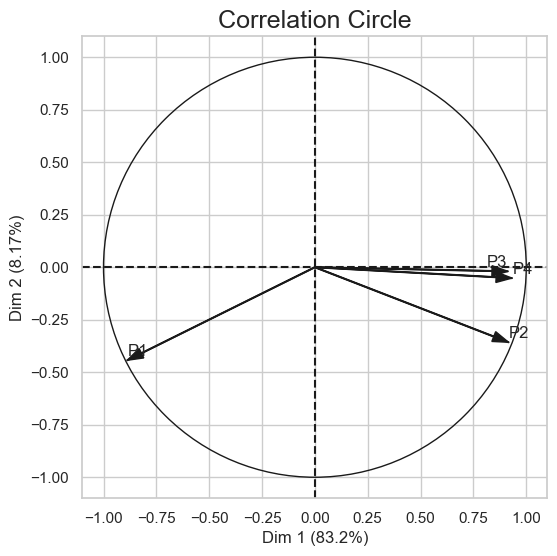

In [50]:

# X_norm2 = StandardScaler().fit_transform(data2) # Normalizing the feature columns is recommended (X - mean) / std centre reduite
fig, correlation_matrix = plot_pca_correlation_graph(
    data2, 
    ['P1','P2','P3','P4'],
    dimensions=(1, 2),
    figure_axis_size=6
)

# Corrlation circle for all 4 variables